You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.


https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv

Inspiration
By the end of this case study , you would be able to answer below questions.
1- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.
2- Who are your target customers with whom you can start marketing strategy [easy to converse]
3- How the marketing strategy works in real world

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.shape

(200, 5)

## CHECKING NULL VALUES

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()

0

## EDA

<AxesSubplot:>

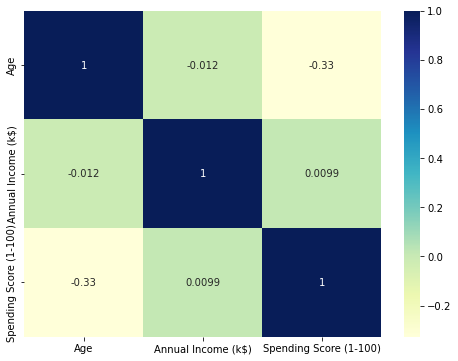

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:,1:].corr(),cmap="YlGnBu", annot=True)

In [10]:
#we can infer from this graphs that most of the data is not correlated with each other    

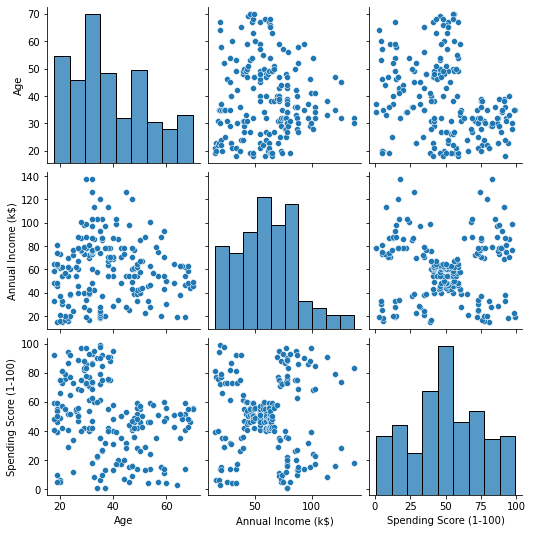

In [11]:
sns.pairplot(df.iloc[:,[2,3,4]])

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

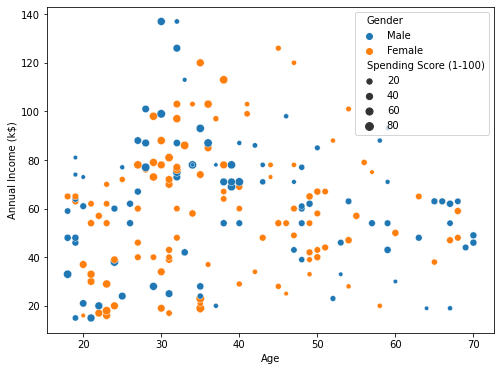

In [12]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df['Age'],y=df['Annual Income (k$)'],hue=df['Gender'],size=df['Spending Score (1-100)'])

In [13]:
#from this scatterplot we an infer that costomer those income is inbetween 65-85 and having age between 30-40 has
#higher spending score




E:\academics\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Female    112
Male       88
Name: Gender, dtype: int64

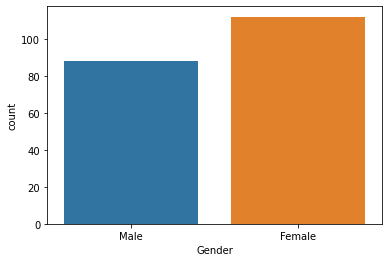

In [14]:
sns.countplot(df['Gender'])
df['Gender'].value_counts()

E:\academics\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

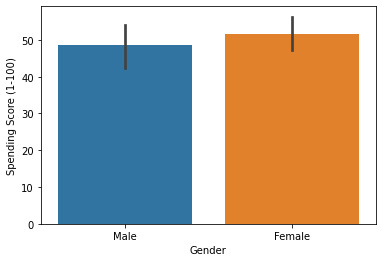

In [15]:
sns.barplot(df['Gender'],df['Spending Score (1-100)'])

In [16]:
#As we can see female has given highest score then man


E:\academics\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Gender'>

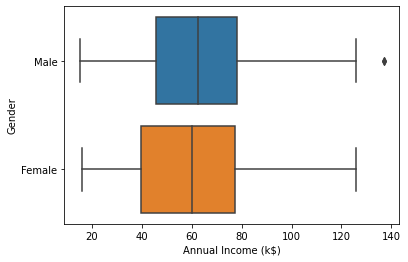

In [17]:
sns.boxplot(df['Annual Income (k$)'],df['Gender'])

In [18]:
#As we can see Avg female income is less then mans income and there is a outier which is in Male category

#our iqr range is in between 40-80

E:\academics\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Age'>

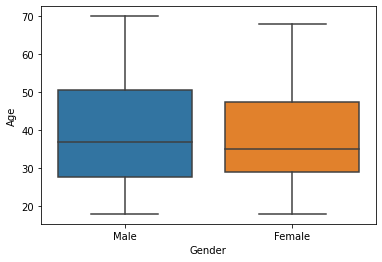

In [19]:
sns.boxplot(df['Gender'],df['Age'])

In [20]:
#from this boxplott we can infer that in both male and female most of the population is in beween of age (45-50)

E:\academics\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\academics\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

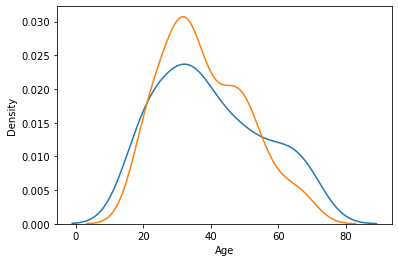

In [21]:
sns.distplot(df[df['Gender']=='Male']['Age'],hist=False)#blueline
sns.distplot(df[df['Gender']=='Female']['Age'],hist=False)#orangeline

In [22]:
#this disibuion plot gives us more clear view on Male and Female costumer

#we can infer that
#1)there male population which are of age 60-65 having 13-14% population density
#2)Same there are female population of age 40-50 having population density

In [23]:
ndf=pd.get_dummies(df['Gender'])

In [24]:
df['Gender']=ndf['Male']


In [25]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


## MODEL SELECTION

In [26]:
#There is no target varieable in our dataset so this is an unsupevised learning problem,


In [27]:
x=df.iloc[:,3:5].values

In [29]:
from sklearn.cluster import KMeans

In [30]:
wcss=[]

In [31]:
for i in range(1,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

E:\academics\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30241.343617936593,
 24990.4343103969,
 22206.986019376236]

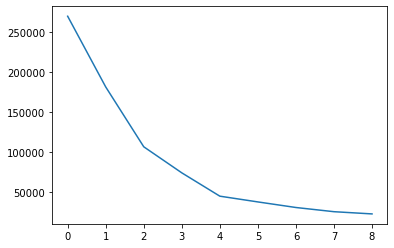

In [33]:
plt.plot(wcss)

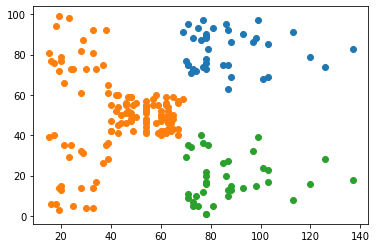

In [34]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(x)

y

plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])



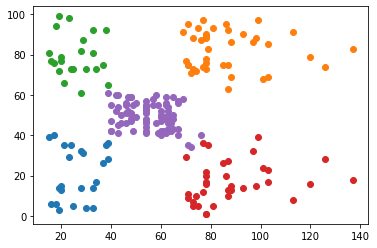

In [35]:
kmeans = KMeans(n_clusters=5)
y = kmeans.fit_predict(x)

plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])
plt.scatter(x[y==3,0],x[y==3,1])
plt.scatter(x[y==4,0],x[y==4,1])



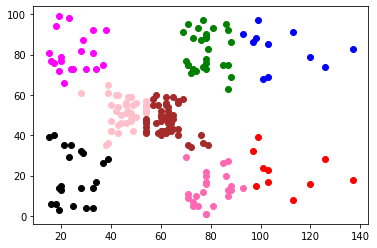

In [36]:
kmeans = KMeans(n_clusters=8)
y = kmeans.fit_predict(x)

plt.scatter(x[y==0,0],x[y==0,1],c='blue')
plt.scatter(x[y==1,0],x[y==1,1],c='pink')
plt.scatter(x[y==2,0],x[y==2,1],c='red')
plt.scatter(x[y==3,0],x[y==3,1],c='black')
plt.scatter(x[y==4,0],x[y==4,1],c='brown')
plt.scatter(x[y==5,0],x[y==5,1],c='hotpink')
plt.scatter(x[y==6,0],x[y==6,1],c='magenta')
plt.scatter(x[y==7,0],x[y==7,1],c='green')
plt.scatter(x[y==8,0],x[y==8,1],c='cyan')

In [37]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [38]:
clustering = AgglomerativeClustering().fit(x)
clustering

AgglomerativeClustering()

In [39]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [ ]:
#DENDOGRAPH

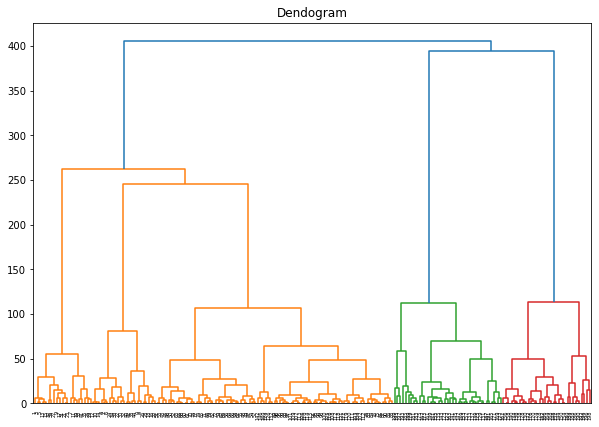

In [42]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Dendogram")
dend=shc.dendrogram(shc.linkage(x,method='ward'))

In [43]:
cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

labels_=cluster.fit_predict(x)

In [44]:
labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)